<h2>Featured Activity 1: Linear Model </h2>

<B> TASKS </B><br>
a. After the initial fitting, evaluate the fit by noting the R2 and p values of the fit. <brr>
b. Change the model so that it line is forced through Wayne Gretzky. Note the R2 and p values of
the fit. This will another line or if you prefer another plot.<br>
c. Now add the data for another player Patrick Kane (he is a current player). You need to get the
data for form online sources. Create a new chart with this addition and force the line through
Kane but not Gretzky. Note R2 and p values of the fit. <br>
d. Make all the model go through (0,0) and create new models. Note R2 and p values of the fit. <br>
e. Create a table of model names (reference), R2 and p values of the fit. Interpret your results. <br>

Load the required libraries.

In [1]:
library(readxl)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Reading the file.

In [2]:
nh1_data=read_excel("data/NHLTop100.xlsx")
head(nh1_data)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [3]:
summary(nh1_data)

      Rank           Player              Team               Pos           
 Min.   :  1.00   Length:100         Length:100         Length:100        
 1st Qu.: 25.75   Class :character   Class :character   Class :character  
 Median : 50.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 50.50                                                           
 3rd Qu.: 75.25                                                           
 Max.   :100.00                                                           
                                                                          
 1st NHL Season     Last NHL Season          GP             G        
 Length:100         Length:100         Min.   : 657   Min.   :185.0  
 Class :character   Class :character   1st Qu.:1108   1st Qu.:391.0  
 Mode  :character   Mode  :character   Median :1246   Median :470.5  
                                       Mean   :1261   Mean   :475.4  
                                       3rd Qu.:140

In [4]:
resultdf = data.frame(Model=character(),Rsquared=integer(),pvalue=character())

Select the required data.


In [5]:
nh1GA_data=select(nh1_data,Rank,Player,GP,G,A,P)
head(nh1GA_data)

Rank,Player,GP,G,A,P
1,Wayne Gretzky,1487,894,1963,2857
2,Mark Messier,1756,694,1193,1887
3,Gordie Howe,1767,801,1049,1850
4,Ron Francis,1731,549,1249,1798
5,Marcel Dionne,1348,731,1040,1771
6,Steve Yzerman,1514,692,1063,1755


Plotting the data using ggplot.

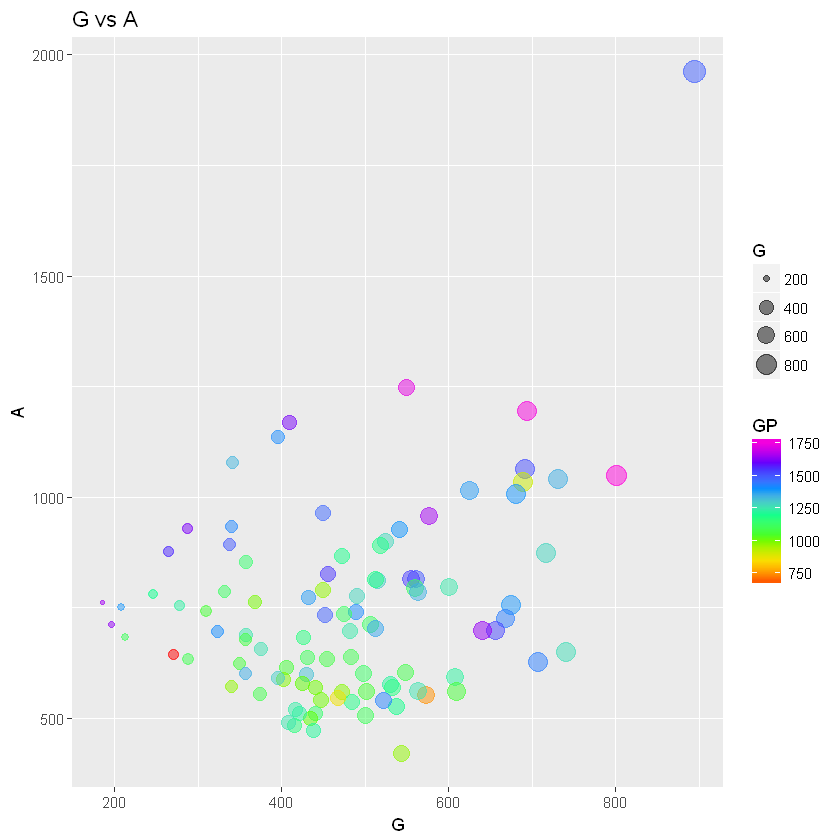

In [6]:
ggplot(nh1GA_data,aes(x=G,y=A,size=G),fill='#FFFFFF') + geom_point(aes(color = GP),alpha = 0.5)+scale_colour_gradientn(colours = rainbow(7)) + ggtitle("G vs A")

For the default fit.

<h3>a. After the initial fitting, evaluate the fit by noting the R2 and p values of the fit.</h3>

In [7]:
nh1GAfit = lm(A ~ G, data=nh1GA_data)
nh1GAfit.predict = predict(nh1GAfit)

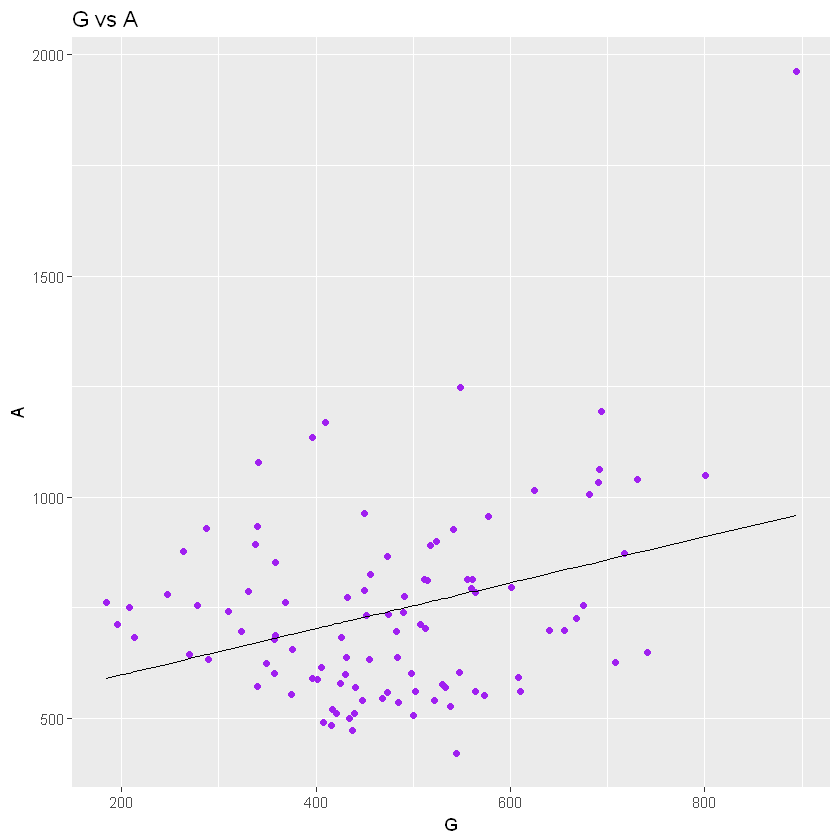

In [8]:
ggplot(nh1GA_data,aes(x=G,y=A)) + geom_point(color="purple") + geom_line(aes(y=nh1GAfit.predict)) + ggtitle("G vs A")

In [9]:
summary(nh1GAfit)


Call:
lm(formula = A ~ G, data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [10]:
nh1GAfit


Call:
lm(formula = A ~ G, data = nh1GA_data)

Coefficients:
(Intercept)            G  
   494.5135       0.5202  


We are getting the slope as 0.5202. We will remember this slope and use it in further models.

In [11]:
slope_default = 0.5202

<h4> R-squared value = 0.1082 <br>
p-value = 0.0008317 </h4>

In [12]:
defaultResult = data.frame(Model="Default Fit",Rsquared=0.01082,pvalue="0.0008317")
resultdf = rbind.data.frame(resultdf,defaultResult) 

In [13]:
resultdf

Model,Rsquared,pvalue
Default Fit,0.01082,0.0008317


<h3> b. Change the model so that it line is forced through Wayne Gretzky. Note the R2 and p values of
the fit. This will another line or if you prefer another plot. </h3>

<h3> First Method </h3>

In [14]:
nh1GAfit_wg = (lm(I(A-1963)~I(G-894)+0, data=nh1GA_data))
nh1GAfit_wg.predict = predict(nh1GAfit_wg, newdata = list(G=0))

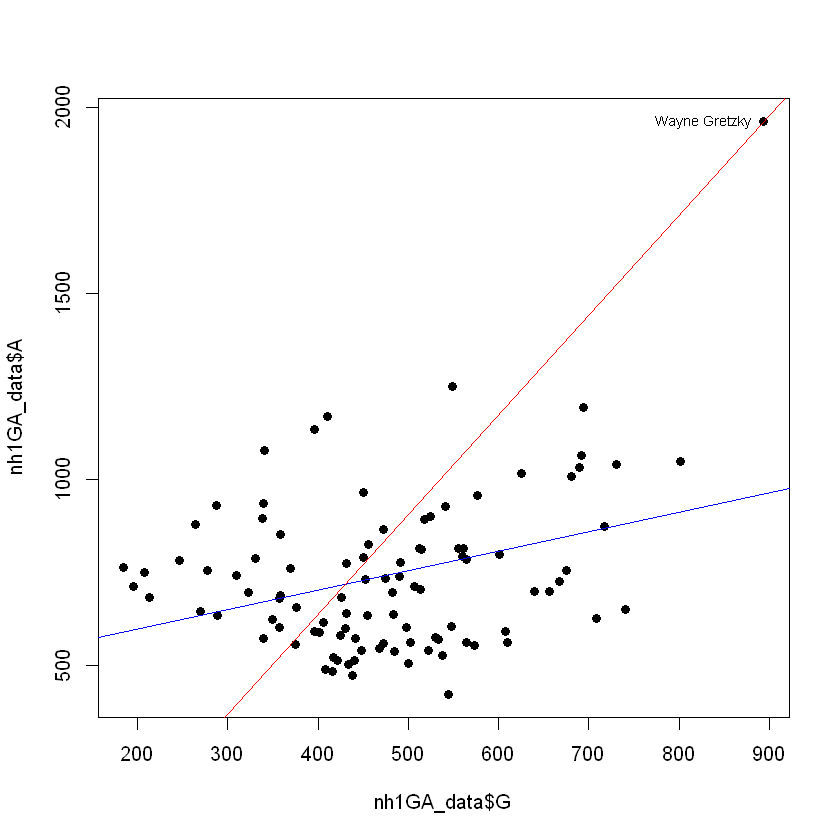

In [15]:
plot(nh1GA_data$G,nh1GA_data$A,pch=19)
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)
abline(nh1GAfit,col="blue")
abline(nh1GAfit_wg.predict+1963,coef(nh1GAfit_wg),col="red")

In [16]:
summary(nh1GAfit_wg)


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = nh1GA_data)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


In [17]:
nh1GAfit_wg


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = nh1GA_data)

Coefficients:
I(G - 894)  
     2.685  


Values of R-squared and p
<B> R-squared value = 0.9091 <br>
p-value < 2.2e-16 </B>

In [18]:
defaultResult = data.frame(Model="Wayne Gretzky",Rsquared=0.9091,pvalue="< 2.2e-16")
resultdf = rbind.data.frame(resultdf,defaultResult) 

In [19]:
resultdf

Model,Rsquared,pvalue
Default Fit,0.01082,0.0008317
Wayne Gretzky,0.90910,< 2.2e-16


<h3> Second Method </h3>

In [20]:
nh1GAfit_wg2 = (lm(I(A-1963)~I(G-894), data=nh1GA_data))
# nh1GAfit_wg2.predict = predict(nh1GAfit_wg2, newdata = list(G=0))
summary(nh1GAfit_wg2)


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(G - 894)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


<b> Intercept : -1003.4220 <br>
Slope : 0.5202 </b>

We will add this intercept in our Assist axis.

In [21]:
nh1GAfit_wg2 = (lm(I(A+1003)~I(G), data=nh1GA_data))
# nh1GAfit_wg2.predict = predict(nh1GAfit_wg2, newdata = list(G=0))
summary(nh1GAfit_wg2)


Call:
lm(formula = I(A + 1003) ~ I(G), data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1497.5135    74.6410  20.063  < 2e-16 ***
I(G)           0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


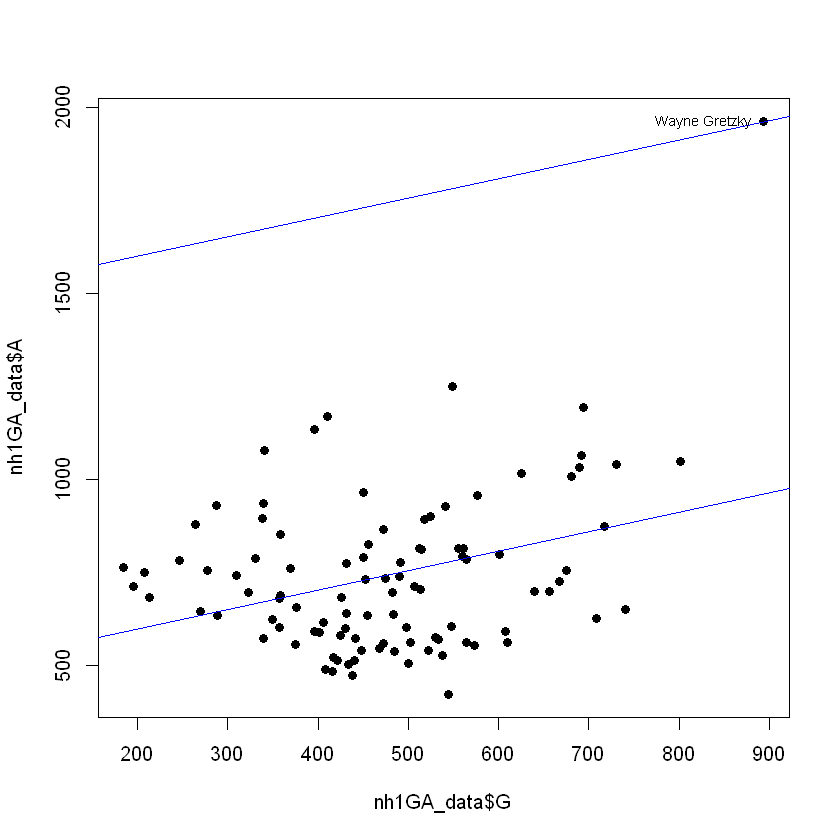

In [22]:
plot(nh1GA_data$G,nh1GA_data$A,pch=19)
abline(coef(nh1GAfit_wg2),col="blue")
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)
abline(nh1GAfit,col="blue")

<h3>c. Now add the data for another player Patrick Kane (he is a current player). You need to get the
data for form online sources. Create a new chart with this addition and force the line through
Kane but not Gretzky. Note R2 and p values of the fit. </h3>

In [23]:
nh1GA_data = as.data.frame(rbind(nh1GA_data, c(101,"Patrick Kane",735,285,462,747)))

In [24]:
nh1GA_data$G=as.numeric(nh1GA_data$G)
nh1GA_data$A=as.numeric(nh1GA_data$A)

<h3> First Method </h3>

In [25]:
nh1GAfit_pk = (lm(I(A-462)~I(G-285)+0, data=nh1GA_data))
nh1GAfit_pk.predict = predict(nh1GAfit_pk, newdata = list(G=0))

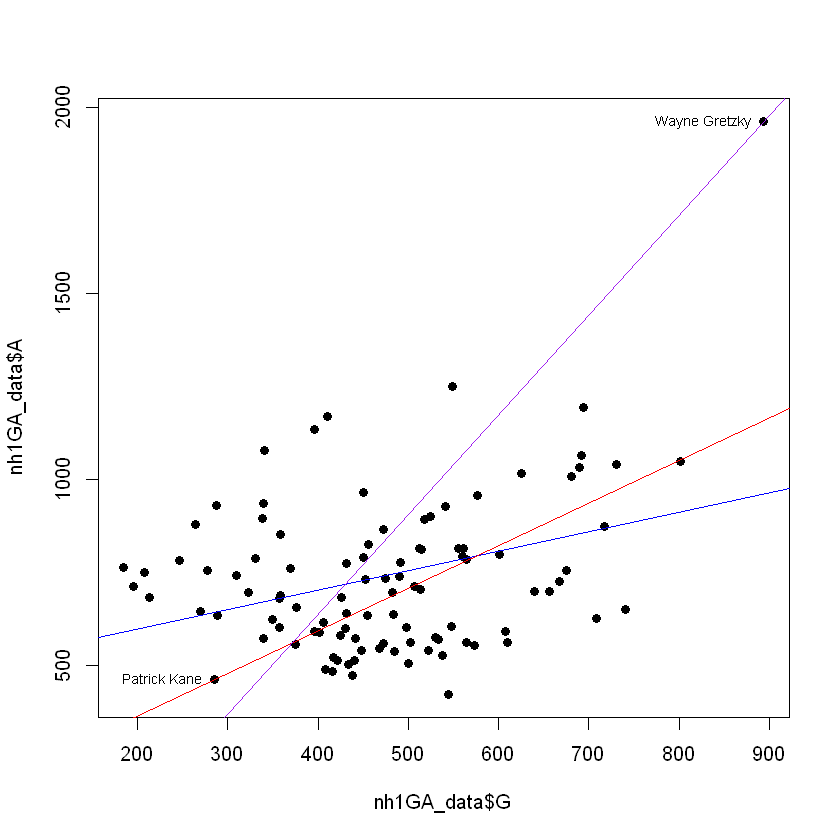

In [26]:
plot(nh1GA_data$G,nh1GA_data$A,pch=19)
text(x=285, y=462, labels="Patrick Kane",cex= 0.7,pos=2)
abline(nh1GAfit,col="blue")
abline(nh1GAfit_pk.predict+462,coef(nh1GAfit_pk),col="red")
abline(nh1GAfit_wg.predict+1963,coef(nh1GAfit_wg),col="purple")
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)

In [27]:
summary(nh1GAfit_pk)


Call:
lm(formula = I(A - 462) ~ I(G - 285) + 0, data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -112.83   40.72  167.42  803.74 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)  1.14493    0.09825   11.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.6 on 100 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5717 
F-statistic: 135.8 on 1 and 100 DF,  p-value: < 2.2e-16


In [28]:
nh1GAfit_pk


Call:
lm(formula = I(A - 462) ~ I(G - 285) + 0, data = nh1GA_data)

Coefficients:
I(G - 285)  
     1.145  


Values of R-squared and p
<B> R-squared value = 0.5759 <br>
p-value < 2.2e-16 </B>

<h3> Second Method </h3>

In [29]:
nh1GAfit_pk2 = (lm(I(A-462)~I(G-285), data=nh1GA_data))
# nh1GAfit_pk.predict = predict(nh1GAfit_pk, newdata = list(G=0))
summary(nh1GAfit_pk2)


Call:
lm(formula = I(A - 462) ~ I(G - 285), data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 175.6358    34.8548   5.039 2.11e-06 ***
I(G - 285)    0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


<b> Intercept : 175.6358 <br>
Slope : 0.5202 </b>

We will add this intercept in Assist axis.


Call:
lm(formula = I(A - 175.6358) ~ I(G), data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 308.6821    73.5982   4.194 5.97e-05 ***
I(G)          0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


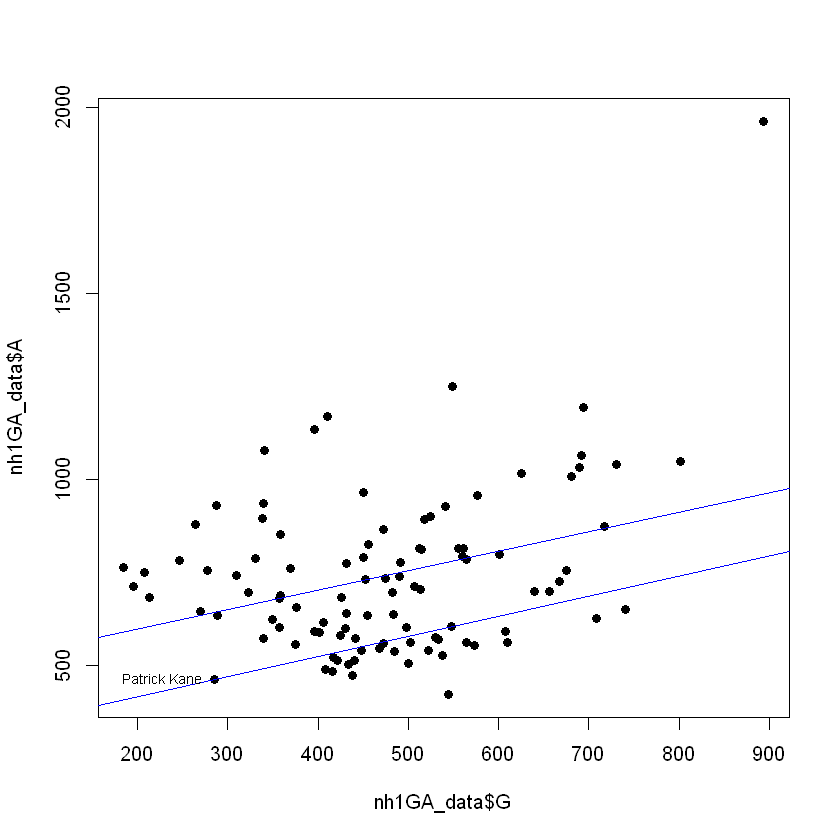

In [30]:
nh1GAfit_pk2 = (lm(I(A-175.6358)~I(G), data=nh1GA_data))
# nh1GAfit_wg2.predict = predict(nh1GAfit_wg2, newdata = list(G=0))
summary(nh1GAfit_pk2)
plot(nh1GA_data$G,nh1GA_data$A,pch=19)
abline(coef(nh1GAfit_pk2),col="blue")
text(x=285, y=462, labels="Patrick Kane",cex= 0.7,pos=2)
abline(nh1GAfit,col="blue")

In [31]:
defaultResult = data.frame(Model="Patrick Kane",Rsquared=0.5759,pvalue="< 2.2e-16")
resultdf = rbind.data.frame(resultdf,defaultResult)
resultdf

Model,Rsquared,pvalue
Default Fit,0.01082,0.0008317
Wayne Gretzky,0.90910,< 2.2e-16
Patrick Kane,0.57590,< 2.2e-16


<h3> d. Make all the model go through (0,0) and create new models. Note R2 and p values of the fit. </h3>

To pass the the line through (0,0) point, we will add 0 in our lm value and to shift the line towards the origin, we will add some value to Assist axis based on multiple observations.

<b>
1. Default Fit Passing through 0,0</b>

In [32]:
nh1GAfit_default = (lm(A~G+0, data=nh1GA_data))
nh1GAfit_default.predict = predict(nh1GAfit_default)

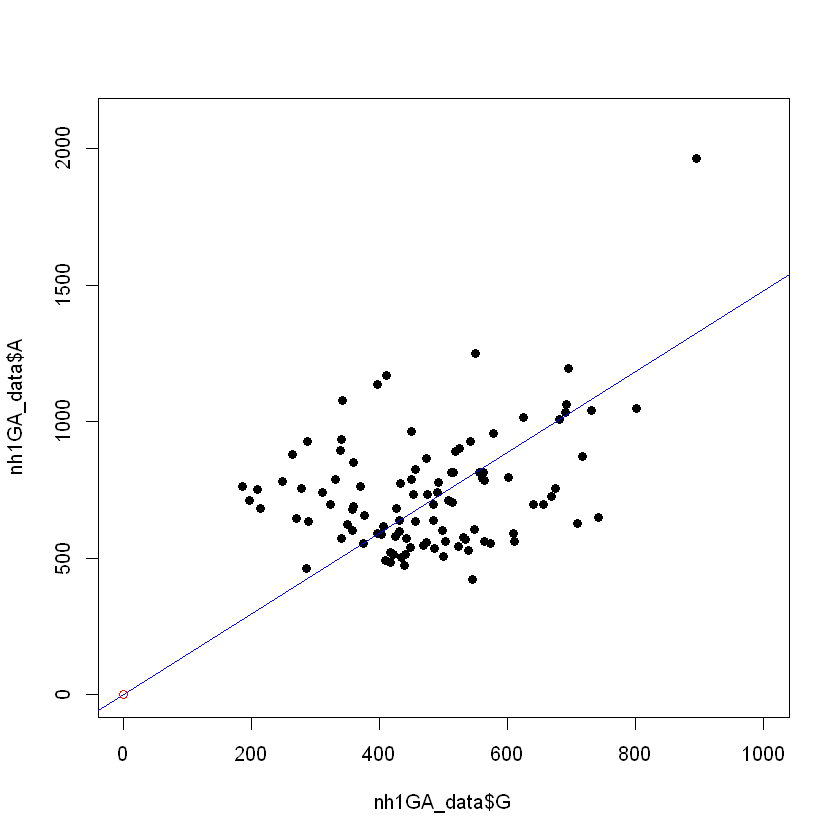

In [33]:
plot(nh1GA_data$G,nh1GA_data$A,pch=19,,xlim=c(0,1000), ylim=c(0,2100))
abline(nh1GAfit_default,col="blue")
points(x=0,y=0, col = "red")

In [34]:
summary(nh1GAfit_default)


Call:
lm(formula = A ~ G + 0, data = nh1GA_data)

Residuals:
   Min     1Q Median     3Q    Max 
-447.3 -137.1    3.6  157.9  639.2 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48080    0.04976   29.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16


In [35]:
nh1GAfit_default


Call:
lm(formula = A ~ G + 0, data = nh1GA_data)

Coefficients:
    G  
1.481  


Values of R-squared and p
<B> R-squared value = 0.8985 <br>
p-value < 2.2e-16 </B>

In [36]:
defaultResult = data.frame(Model="Default Fit passing through 0,0",Rsquared=0.8985,pvalue="< 2.2e-16")
resultdf = rbind.data.frame(resultdf,defaultResult)
resultdf

Model,Rsquared,pvalue
Default Fit,0.01082,0.0008317
Wayne Gretzky,0.90910,< 2.2e-16
Patrick Kane,0.57590,< 2.2e-16
"Default Fit passing through 0,0",0.89850,< 2.2e-16


<b>2. Wayne Gretzky</b>

In [37]:
nh1GAfit_wg00 = (lm(A+368~G+0, data=nh1GA_data))
nh1GAfit_wg00.predict = predict(nh1GAfit_wg00)

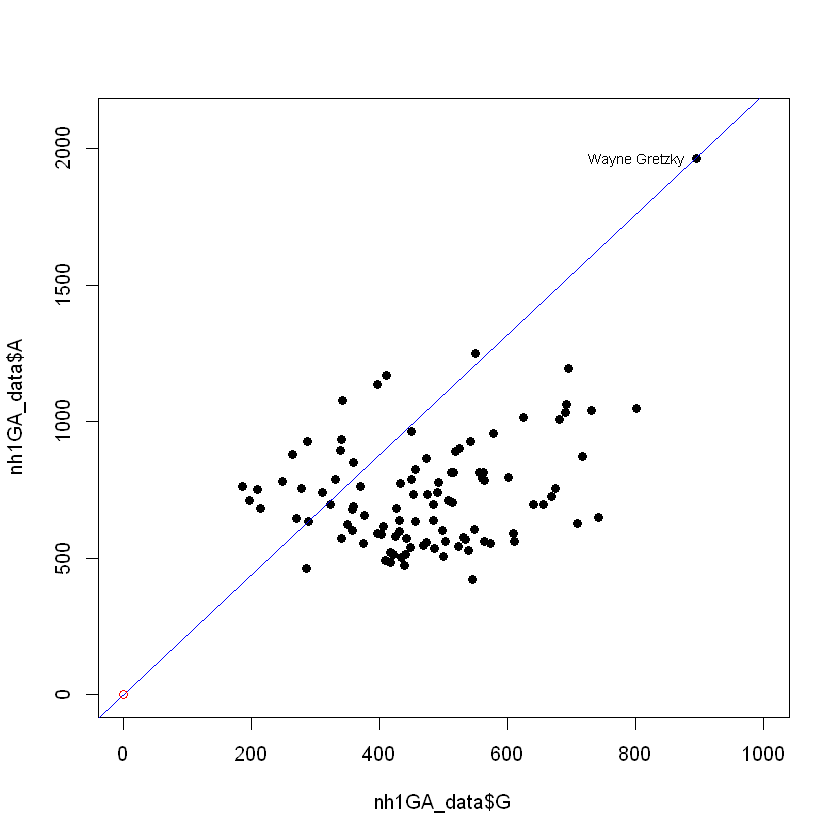

In [38]:
plot(nh1GA_data$G,nh1GA_data$A,pch=19,xlim=c(0,1000), ylim=c(0,2100))
abline(nh1GAfit_wg00,col="blue")
points(x=0,y=0, col="red")
text(x=894, y=1963, labels="Wayne Gretzky",cex= 0.7,pos=2)

In [39]:
summary(nh1GAfit_wg00)


Call:
lm(formula = A + 368 ~ G + 0, data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-610.13 -121.29   30.37  225.18  724.52 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  2.19720    0.06369    34.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 315.7 on 100 degrees of freedom
Multiple R-squared:  0.9225,	Adjusted R-squared:  0.9217 
F-statistic:  1190 on 1 and 100 DF,  p-value: < 2.2e-16


In [40]:
nh1GAfit_wg00


Call:
lm(formula = A + 368 ~ G + 0, data = nh1GA_data)

Coefficients:
    G  
2.197  


Values of R-squared and p
<B> R-squared value = 0.9225 <br>
p-value < 2.2e-16 </B>

In [41]:
defaultResult = data.frame(Model="Wayne Gretzky passing through 0,0",Rsquared=0.9225,pvalue="< 2.2e-16")
resultdf = rbind.data.frame(resultdf,defaultResult)
resultdf

Model,Rsquared,pvalue
Default Fit,0.01082,0.0008317
Wayne Gretzky,0.90910,< 2.2e-16
Patrick Kane,0.57590,< 2.2e-16
"Default Fit passing through 0,0",0.89850,< 2.2e-16
"Wayne Gretzky passing through 0,0",0.92250,< 2.2e-16


<b>3. Patrick Kane Passing through 0,0 </b>

In [42]:
nh1GAfit_pk00 = (lm(A+70~G+0, data=nh1GA_data))
nh1GAfit_pk00.predict = predict(nh1GAfit_pk00)

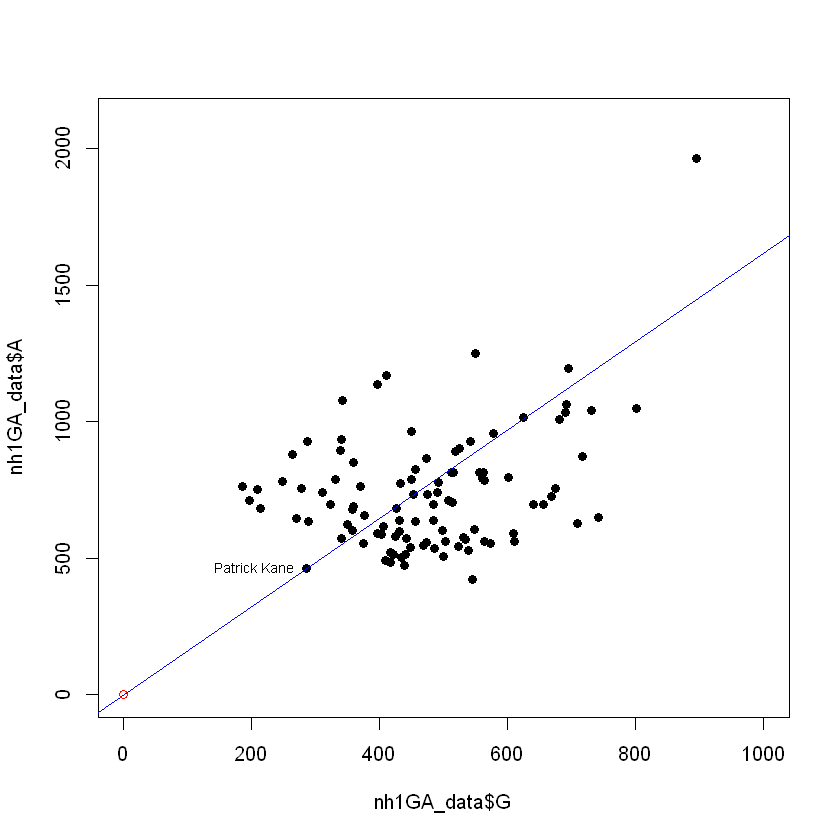

In [43]:
plot(nh1GA_data$G,nh1GA_data$A,pch=19,xlim=c(0,1000), ylim=c(0,2100))
abline(nh1GAfit_pk00,col="blue")
points(x=0,y=0, col="red")
text(x=285, y=462, labels="Patrick Kane",cex= 0.7,pos=2)

In [44]:
summary(nh1GAfit_pk00)


Call:
lm(formula = A + 70 ~ G + 0, data = nh1GA_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-478.25 -130.81   13.99  170.13  597.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.61707    0.05206   31.06   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 258 on 100 degrees of freedom
Multiple R-squared:  0.9061,	Adjusted R-squared:  0.9052 
F-statistic: 964.9 on 1 and 100 DF,  p-value: < 2.2e-16


In [45]:
nh1GAfit_pk00


Call:
lm(formula = A + 70 ~ G + 0, data = nh1GA_data)

Coefficients:
    G  
1.617  


Values of R-squared and p
<B> R-squared value = 0.9061 <br>
p-value < 2.2e-16 </B>

In [46]:
defaultResult = data.frame(Model="Patrick Kane passing through 0,0",Rsquared=0.9061,pvalue="< 2.2e-16")
resultdf = rbind.data.frame(resultdf,defaultResult)
resultdf

Model,Rsquared,pvalue
Default Fit,0.01082,0.0008317
Wayne Gretzky,0.90910,< 2.2e-16
Patrick Kane,0.57590,< 2.2e-16
"Default Fit passing through 0,0",0.89850,< 2.2e-16
"Wayne Gretzky passing through 0,0",0.92250,< 2.2e-16
"Patrick Kane passing through 0,0",0.90610,< 2.2e-16


<h3>Interpreting the Results:  </h3>

The above table shows us the values of R-squared and p-value for different models, some forced to pass through origin. <br>
• R-square tells you how much variation is explained by our model. <br>
• p-value tells us about the F statistic hypothesis testing of the "fit of the intercept only model and your model are
equal. p-value less than the significance level (< 0.05) then our models fits the data well.
<br><br>
Through our resultdf table, it is clear that we have p-value less than 0.05 and hence all models fits our data well.
Only the thing is same for all moels except for default fit line. <br>
•  A predictor that has a low p-value is likely to be a meaningful addition to our model because changes in the predictor's value are related to changes in the response variable.<br>
• Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.<br>
<br>
Then we also observe that we have quite different values for R-sqaure for every model. We are interested in high R-sqaured and low p-values. As there is no such variation in p-values, let us consider only R-squared values now.<br> 
• High R-squared value is obained for Wayne Gretzky passing through point(0,0) which is greater than the same model but not passing through (0,0). Wayne Gretzky point can be considered as outlier due to its high x and y points. Hence we can interpret that outliers when passed through (0,0) can give us high R-squared value.<br>
• For all the models, R-squared value has increased when passed through point(0,0). <br>
<br>
Again this interpretation depends on data and hence R-squared an p-values will entirely depend on data and distribution of values in that data.